In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np


In [60]:
# simulation parameters

population_size = 2.3e5

sample_size = 50
number_of_samples = 500

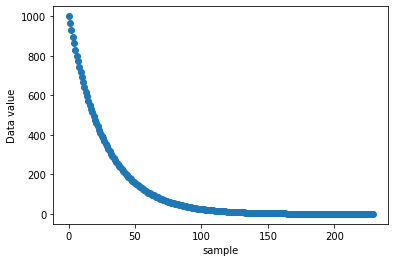

117.38775322201926

In [61]:
# Generate population of numbers

truemean = np.mean(population)

population = 1/np.logspace(np.log10(0.001),np.log10(5),int(population_size))
skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()
truemean

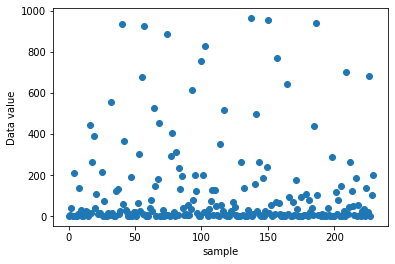

In [62]:
# Shuffle data

np.random.shuffle(population)
skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

In [63]:
samplemeans = np.zeros(number_of_samples)

np.mean(np.random.choice(population,size=sample_size))

for expi in range(number_of_samples):
  randsample = np.mean(np.random.choice(population,size=sample_size))
  samplemeans[expi] = randsample

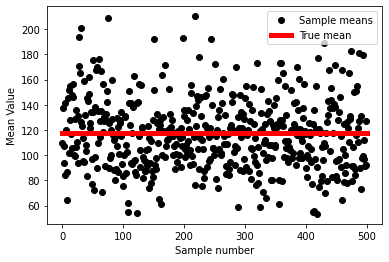

In [64]:
plt.plot(samplemeans,'ko', label = 'Sample means')
plt.plot([0,number_of_samples],[truemean,truemean],'r',linewidth = 5, label = 'True mean')
plt.xlabel('Sample number')
plt.ylabel('Mean Value')
plt.legend()

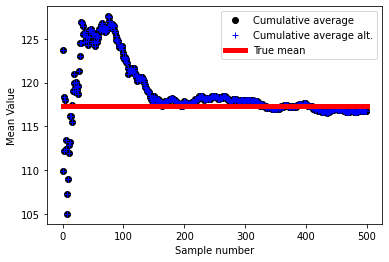

In [65]:
# Cumulative average

cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
  cumave[i] = np.mean(samplemeans[:i+1])

cumave2 = np.cumsum(samplemeans)/np.arange(1,number_of_samples+1)

plt.plot(cumave,'ko', label = 'Cumulative average')
plt.plot(cumave2,'b+', label = 'Cumulative average alt.')
plt.plot([0,number_of_samples],[truemean,truemean],'r',linewidth = 5, label = 'True mean')
plt.xlabel('Sample number')
plt.ylabel('Mean Value')
plt.legend()

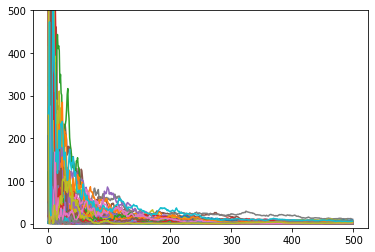

In [75]:
number_of_meta_samples = 100

cumaves = np.zeros((number_of_meta_samples, number_of_samples))
allsamplemeans = np.zeros_like(cumaves)

for metai in range(number_of_meta_samples):
  for expi in range(number_of_samples):
    randsample = np.mean(np.random.choice(population,size=sample_size))
    samplemeans[expi] = randsample

    # now get cumulative avg divergences
    tmp = np.cumsum(samplemeans)/np.arange(1,number_of_samples+1)
    cumaves[metai,:] = (tmp-truemean)**2

    # store samplemeans
    allsamplemeans[metai,:] = samplemeans

plt.plot(cumaves.T)
plt.ylim([-10,500])
plt.show()


Text(0, 0.5, 'Count')

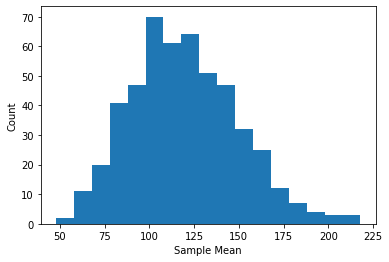

In [76]:
# Central Limit Theorem

plt.hist(samplemeans,bins='fd') # Freedman-Diaconis
plt.xlabel('Sample Mean')
plt.ylabel('Count')

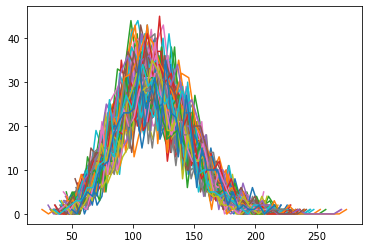

In [81]:
nbins = 40
y,x = np.histogram(allsamplemeans[0,:],bins = nbins)
x = (x[1:]+x[:-1])/2
plt.plot(x,y)
for i in range(number_of_meta_samples):
  y,x = np.histogram(allsamplemeans[i,:],bins = nbins)
  x = (x[1:]+x[:-1])/2
  plt.plot(x,y)
plt.show()